In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Estimadores para distribuciones de puntos aleatorios

In [2]:
# Genera una distribucion uniforme de puntos en una caja de lado L y obtiene el histograma
def rand_RR(dim, N, L, bins,tipo):
    # Hacer un conjuntos de N puntos en [0,L] de dimension 'dim'
    D = np.random.random((dim, N))*L # se crean dos renglones
    
    # Form the periodic distance array
    dist = D[:,None] - D[...,None] # resta todas las combinaciones y los almacena en dos matrices una para cada renglon
    #dist -= np.round(dist/L)*L # creo q tiene q ver cuando L es diferente de 1, los randome son entre cero y uno
    dist_D = (dist**2).sum(axis=0)**.5 # axis=0, asegura que use los datos de cada renglon, y no las columnas. Devuelve una matriz triangular
    dist_D = dist_D[np.triu_indices(N, k = 1)] # extrae el tringulo superior (puede ser el inferior pq es simetrica), hay q especificar el número N
    
    #Histograma
    
    count_D, bins_D, ignored_D = plt.hist(dist_D,bins = bins,color='purple',edgecolor = 'black',  linewidth=1)
    plt.title('Histograma de distancias datos %s'%tipo)
    plt.legend()
    plt.show()
    return D, dist_D, count_D # Regresa los datos D, la distancias, y las frecuenciass


# Calcula las distancias entre los datos y los valores aleatorios
def rand_DDRR(D, R, bins):
    
    dist = D[:,None] - R[...,None]
    dist_DDRR = (dist**2).sum(axis=0)**.5
    dist_DDRR = dist_DDRR.flatten()
    
    '''
    dist_DDRR = []
    for i in range(np.shape(D)[1]): # número de datos de DD
        for j in range(np.shape(R)[1]): # número de datos de RR
            DDRR=np.sqrt((D[0][i] - R[0][j])**2 + (D[1][i]-R[1][j])**2)
            dist_DDRR.append(DDRR)
    '''
    
    #Histograma
    count_DDRR, bins_DDRR, ignored_DDRR = plt.hist(dist_DDRR, bins = bins,color='purple',edgecolor = 'black',  linewidth=1)
    plt.title('Histograma de distancias datos_DDRR')
    plt.legend()
    plt.show()
    
    return dist_DDRR, count_DDRR

# Estimadores

### Estimador de Peebles-Hauser 

$\xi_{PH}^2 = \frac{DD(r)}{RR(r)} - 1$

### Estimador de Davis-Peebles 

$\xi_{PH}^2 = \frac{DD(r)}{DR(r)} - 1$

### Estimador de Correlacion Hamilton 

$\xi_{H}^{2} = \frac{DD(r)RR(r)}{(DR(r))^{2}}$

### Estimador de Correlación Landy-Szalay 

$\xi_{LZ}^2 = \frac{DD(r)-2DR(r)+RR(r)}{RR(r)}  $

In [3]:
def peebles(DD,RR):
    return (DD/RR)-1

def davis(DD,DR):
    return (DD/DR)-1

def hamilton(DD,RR,DR):
    return (DD*RR)/(DR)**2

def landy(DD,RR,DR):
    return (DD+RR-2*DR)/RR

# Distribución de puntos 2D

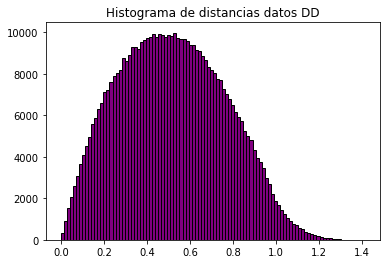

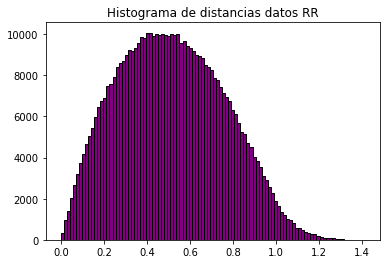

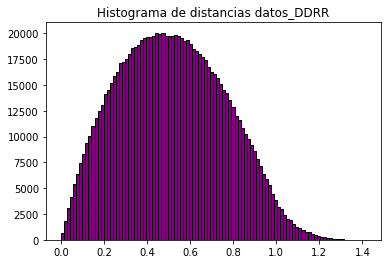

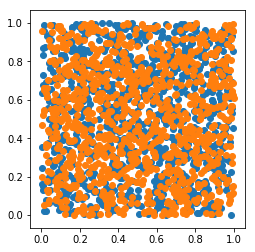

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


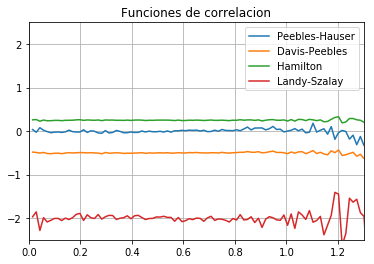

In [4]:
N = 1000 # Numero de puntos
L = 1. # Longitud de la caja
dim = 2 # Dimension 
bins = np.linspace(0,np.sqrt(2)*L,101) # Intervalos de las distancias

# Datos 
D, dist_DD, DD = rand_RR(dim,N, L, bins,'DD')
x_D,y_D = D # como D son dos filas, le asignamos a cada una la coordenada

# Random 
R, dist_RR, RR = rand_RR(dim,N, L, bins,'RR')
x_R,y_R = R # como D son dos filas, le asignamos a cada una la coordenada

# DD-RR
dist_DDRR, DDRR = rand_DDRR(D,R,bins)

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_D,y_D)
ax.scatter(x_R,y_R)
plt.show()

# Comparando las tres funciones de correlacion
PH = peebles(DD,RR)
D = davis(DD,DDRR)
H = hamilton(DD,RR,DDRR)
LS = landy(DD,RR,DDRR)
plt.clf()
plt.plot(bins[1:],PH,label= 'Peebles-Hauser')
plt.plot(bins[1:],D,label= 'Davis-Peebles')
plt.plot(bins[1:],H,label= 'Hamilton')
plt.plot(bins[1:],LS,label= 'Landy-Szalay')
plt.title('Funciones de correlacion')
plt.xlim(0,1.3)
plt.ylim(-2.5,2.5)
plt.grid()
plt.legend()
plt.show()

# Distribución de puntos 3D

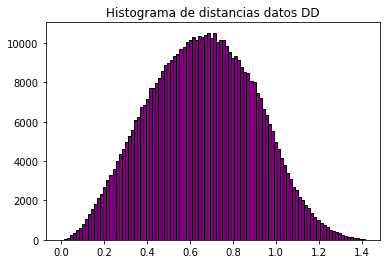

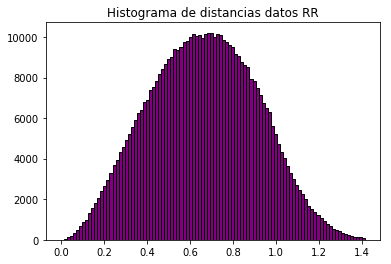

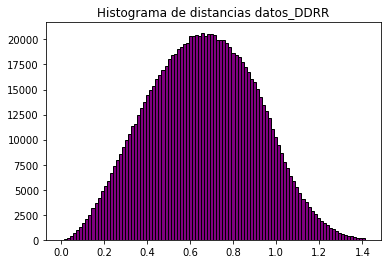

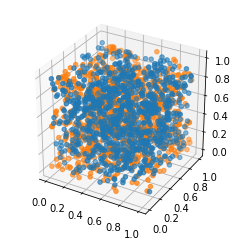

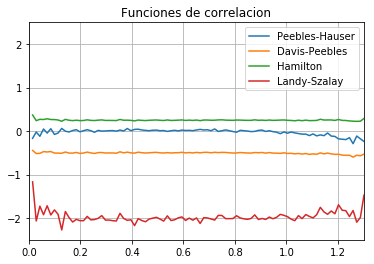

In [5]:
from mpl_toolkits.mplot3d import Axes3D 

N = 1000 # Numero de puntos
L = 1. # Longitud de la caja
dim = 3 # Dimension 
bins = np.linspace(0,np.sqrt(2)*L,101) # Intervalos de las distancias

# Datos 
D, dist_DD, DD = rand_RR(dim,N, L, bins,'DD')
x_D,y_D,z_D = D # como D son dos filas, le asignamos a cada una la coordenada

# Random 
R, dist_RR, RR = rand_RR(dim,N, L, bins,'RR')
x_R,y_R,z_R = R # como D son dos filas, le asignamos a cada una la coordenada

# DD-RR
dist_DDRR, DDRR = rand_DDRR(D,R,bins)

fig = plt.figure()
cx = fig.add_subplot(111, projection='3d')
cx.set_aspect('equal')
cx.scatter(x_D,y_D,z_D)
cx.scatter(x_R,y_R,z_R)

plt.show()

# Comparando las tres funciones de correlacion
PH = peebles(DD,RR)
D = davis(DD,DDRR)
H = hamilton(DD,RR,DDRR)
LS = landy(DD,RR,DDRR)
plt.clf()
plt.plot(bins[1:],PH,label= 'Peebles-Hauser')
plt.plot(bins[1:],D,label= 'Davis-Peebles')
plt.plot(bins[1:],H,label= 'Hamilton')
plt.plot(bins[1:],LS,label= 'Landy-Szalay')
plt.title('Funciones de correlacion')
plt.xlim(0,1.3)
plt.ylim(-2.5,2.5)
plt.grid()
plt.legend()
plt.show()